In [423]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [424]:
class Cell:
    'A position on the Board'
    def __init__(self, location):
        self.location = location
        chars = [c for c in self.location]
        self.x = int(chars[0])
        self.y = -1 * int(chars[1])
        self.symbol = None
           

In [425]:
class TTTBoard:
    'Tick Tack Toe Board using Matplotlib'
    def __init__(self):
        'Generate Board Cells'
        self.cells = {}  # dictionary for location ('ij') lookup
        for i in range(1,4):
            for j in range(1,4):
                location = f'{i}' + f'{j}'
                cell = Cell(location)
                self.cells[location] = cell
        self.ax = None
        self.fig = None
                
    def drawX(self, cell):
        "Draw an 'X'"
        self.ax.plot([cell.x-0.4, cell.x+0.4], [cell.y-0.4, cell.y+0.4], color='b')
        self.ax.plot([cell.x-0.4, cell.x+0.4], [cell.y+0.4, cell.y-0.4], color='b')
        
    def drawO(self, cell):
        "Draw an 'O'"
        circ = mpl.patches.Circle((cell.x, cell.y), radius=0.4, linewidth=1, edgecolor='r', facecolor='w')
        self.ax.add_patch(circ)      
    
    def drawBoard(self):
        # draw board
        fig, ax = plt.subplots()
        self.ax = ax
        self.fig = fig
        plt.xlim((0,4))
        plt.ylim((-4,-0.0))
        self.ax.set_xticks([1,2,3])
        self.ax.set_yticks([-1, -2, -3],['1','2','3'])
        for location in self.cells:
            cell = self.cells[location]
            x = cell.x - 0.5
            y = cell.y - 0.5
            rect = mpl.patches.Rectangle((x,y), 1, 1, linewidth=1, edgecolor='k', facecolor='w')
            self.ax.add_patch(rect)
            if cell.symbol == 'X':
                self.drawX(cell)
            elif cell.symbol == 'O':
                self.drawO(cell)
        self.ax.plot()
        plt.show()
        
        

In [426]:
# Tick-Tack-Toe in OOP and matplotlib
class TTT:
    'game of TTT'
    def __init__(self):
        self.board = TTTBoard()
        self.board.drawBoard()
        self.currentPlayer = 'X'
        self.gameOver = False
        self.winner = None
        
    def changePlayer(self):
        if self.currentPlayer == 'X':
            self.currentPlayer = 'O'
        else:
            self.currentPlayer = 'X'
          
    def validateMove(self, move):
        if move.upper() == 'RESIGN' or move.upper() == 'QUIT':
            self.gameOver = True
            self.changePlayer() # other player wins
            self.winner = self.currentPlayer
            return True
        elif move in set(['11', '12', '13', '21', '22', '23', '31', '32', '33']) \
            and self.board.cells[move].symbol == None:
                self.board.cells[move].symbol = self.currentPlayer
                return True
        else:
            print('Invalid move.  Try again.')
            self.playerMove(self.currentPlayer)
            return False
        
    def checkWin(self, move):
        # check is after a move so check for current player only or draw and
        # only check row, column diagonals that are part if current move
        if self.gameOver:   # quit or resign
            return
        chars = [c for c in move]
        col = chars[0] # x
        row = chars[1] # y
        symbols = [self.board.cells[key].symbol for key in self.board.cells.keys()]
        # only need to check y row
        if self.board.cells['1' + row].symbol == self.board.cells['2'+ row].symbol and \
            self.board.cells['2' + row].symbol == self.board.cells['3' + row].symbol:
            self.winner = self.currentPlayer
            self.gameOver = True
            return
        # only need to check x column
        elif self.board.cells[col + '1'].symbol == self.board.cells[col + '2'].symbol and \
            self.board.cells[col + '2'].symbol == self.board.cells[col + '3'].symbol:
            self.winner = self.currentPlayer
            self.gameOver = True
            return
        # diagonals
        elif move in ['11', '13', '31', '33', '22'] and self.board.cells['22'].symbol != None: 
            if self.board.cells['11'].symbol == self.board.cells['22'].symbol and \
                self.board.cells['22'].symbol == self.board.cells['33'].symbol:
                self.winner = self.currentPlayer
                self.gameOver = True
                return
            elif self.board.cells['13'].symbol == self.board.cells['22'].symbol and \
                self.board.cells['22'].symbol == self.board.cells['31'].symbol:
                self.winner = self.currentPlayer
                self.gameOver = True
                return
        # draw
        if all(symbols):
            print('No Winner.')
            self.gameOver = True 
    
    def playerMove(self, currentPlayer):
        # get move
        move = input(f'Player {currentPlayer}, make your move:')
        if self.validateMove(move):
            self.board.drawBoard()
            self.checkWin(move)
            self.changePlayer()
        
        
    def play(self):
        'Play the game'
        print('"X" goes first')
        while not self.gameOver:
            self.playerMove(self.currentPlayer)
        print('Game Over')
        if self.winner != None:
            print(f'{self.winner} has won!')
        return

    

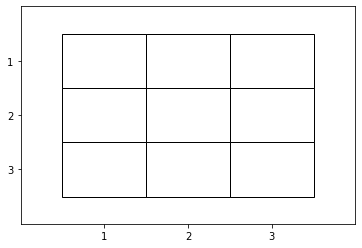

"X" goes first
Player X, make your move:11


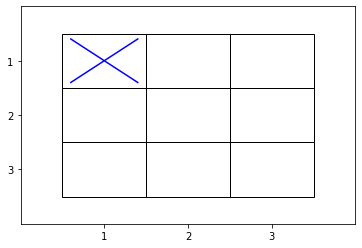

Player O, make your move:22


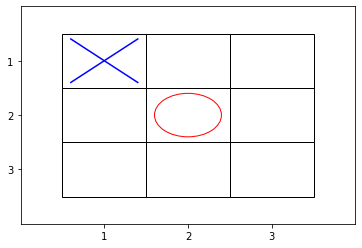

Player X, make your move:21


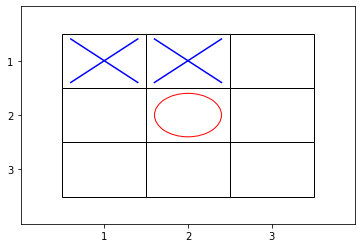

Player O, make your move:13


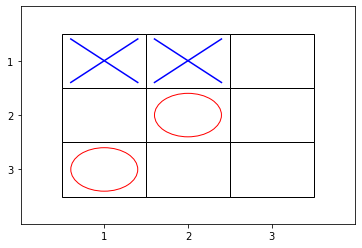

Player X, make your move:31


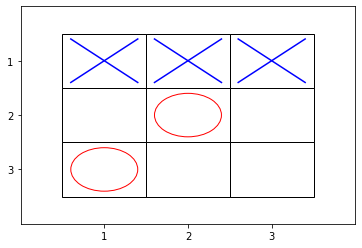

Game Over
X has won!


In [427]:
game = TTT()
game.play()